In [2]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
def readCsvToDF(path):
    dataSeries = pd.read_csv(path)
    dataSeries = dataSeries.rename(columns={'Unnamed: 0': 'Time'})
    TimeIndex = dataSeries['Time']
    dataSeries.index = pd.to_datetime(TimeIndex)
    dataSeries = dataSeries[::-1]
    dataSeries = dataSeries.drop('Time', axis=1)
    return dataSeries

# convert series to supervised learning
# data - данные
# n_in - лаг
# n_out - количество таргетов
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, dof=0):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]     
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [4]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [111]:
dataSet = readCsvToDF('Data/dataset.csv')
trainData = dataSet[:-24*10*2]
testData = dataSet[-24*10*2:]
dataSet.head()

,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,sensor 6,sensor 7,sensor 8,sensor 9
Time,,,,,,,,,
2019-12-11 10:00:00,541.854431,771.818909,728.981018,707.271729,660.441406,776.562866,0.0,1953.543945,2174.231445
2019-12-11 11:00:00,546.210815,770.051453,728.879578,706.880798,663.398987,772.937256,0.0,1942.814331,2164.085205
2019-12-11 12:00:00,554.211792,770.167908,728.721802,707.779419,665.061401,771.868408,0.0,1968.240601,2188.068848
2019-12-11 13:00:00,552.346313,768.941040,728.868286,708.314941,665.139282,771.105408,0.0,1952.284790,2171.464355
2019-12-11 14:00:00,553.290344,769.628296,729.002502,708.390503,665.938660,770.952454,0.0,1966.600708,2185.202637


(758, 4320)
(758, 2160)
Training...
Train on 758 samples
Epoch 1/200
758/758 - 3s - loss: 0.3457
Epoch 2/200
758/758 - 3s - loss: 0.3429
Epoch 3/200
758/758 - 3s - loss: 0.3396
Epoch 4/200
758/758 - 3s - loss: 0.3359
Epoch 5/200
758/758 - 3s - loss: 0.3317
Epoch 6/200
758/758 - 3s - loss: 0.3272
Epoch 7/200
758/758 - 3s - loss: 0.3223
Epoch 8/200
758/758 - 3s - loss: 0.3170
Epoch 9/200
758/758 - 3s - loss: 0.3114
Epoch 10/200
758/758 - 3s - loss: 0.3054
Epoch 11/200
758/758 - 3s - loss: 0.2987
Epoch 12/200
758/758 - 3s - loss: 0.2911
Epoch 13/200
758/758 - 3s - loss: 0.2820
Epoch 14/200
758/758 - 3s - loss: 0.2705
Epoch 15/200
758/758 - 3s - loss: 0.2553
Epoch 16/200
758/758 - 3s - loss: 0.2362
Epoch 17/200
758/758 - 3s - loss: 0.2176
Epoch 18/200
758/758 - 3s - loss: 0.2090
Epoch 19/200
758/758 - 3s - loss: 0.1977
Epoch 20/200
758/758 - 3s - loss: 0.1793
Epoch 21/200
758/758 - 3s - loss: 0.1629
Epoch 22/200
758/758 - 3s - loss: 0.1467
Epoch 23/200
758/758 - 3s - loss: 0.1335
Epoch 24/

758/758 - 3s - loss: 0.0590
Epoch 198/200
758/758 - 3s - loss: 0.0596
Epoch 199/200
758/758 - 3s - loss: 0.0574
Epoch 200/200
758/758 - 3s - loss: 0.0579


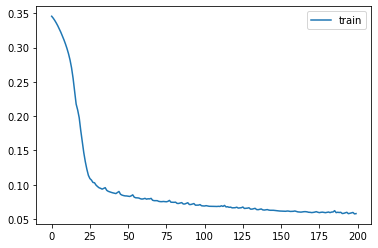

In [137]:
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import MSE

from rbflayer import RBFLayer, InitCentersRandom
from kmeans_initializer import InitCentersKMeans
from initializer import InitFromFile
from sklearn.metrics import mean_squared_error, r2_score


n_hours, n_target = 24*10, 24*10

values = trainData.values
test_values = testData.values

values = values.astype('float32')
test_values = test_values.astype('float32')

# Нормируем данные на 0, 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

test_scaler = MinMaxScaler(feature_range=(0, 1))
test_scaled = test_scaler.fit_transform(test_values)

# Преобразуем данные в соответствии с заданным шагом
reframed = series_to_supervised(scaled, n_hours, n_target)
test_reframed = series_to_supervised(test_scaled, n_hours, n_target)

print(reframed.shape)

train = reframed.values
test = test_reframed.values
train_X, train_y = train[:, :-9*n_target], train[:, -9*n_target:]
test_X, test_y = test[:,:-9*n_target], test[:, -9*n_target:]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))

print(train_X.shape)


rbflayer1 = RBFLayer(100, initializer=InitCentersKMeans(train_X), betas=0.09, input_shape=(train_X.shape[1],))
#rbflayer2 = RBFLayer(216, betas=0.01, input_shape=(10,))

# design network
model = Sequential()
model.add(rbflayer1)
model.add(Dense(2160, activation='relu'))
#model.add(Dense(n_outputs, use_bias=False))
model.compile(loss='mae', optimizer='adam')



# fit network
print("Training...")
history = model.fit(train_X, train_y, 
                    epochs=200, 
                    batch_size=240,  
                    verbose=2,
                    shuffle=False)

# plot history
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [138]:
yhat = model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#inv_yhat = yhat
column = yhat.shape[1]
inv_yhat = np.zeros_like(yhat[:,0]).reshape(-1,1)

for i in range(column//9):
    inv_yhat_buf = test_scaler.inverse_transform(yhat[:, i*9:(i+1)*9])
    inv_yhat = np.hstack((inv_yhat, inv_yhat_buf))
inv_yhat = inv_yhat[:, 1:]
    
# inver scaling for actual
#test_y = test_y.reshape((test_y.shape[0],test_y.shape[1]))
#inv_y = concatenate((test_y, test_X[:, :]), axis=1)
#inv_y = test_y

inv_y = np.zeros_like(test_y[:,0]).reshape(-1,1)
for i in range(column//9):
    inv_y_buf = test_scaler.inverse_transform(test_y[:, i*9:(i+1)*9])
    inv_y = np.hstack((inv_y, inv_y_buf[:,:]))
inv_y = inv_y[:, 1:]
    
# calculate RMSE
for i in range(9):
    rmse = np.sqrt(mean_squared_error(inv_y[:,i::9].T, inv_yhat[:,i::9].T))
    r2 = r2_score(inv_y[:,i::9].T, inv_yhat[:,i::9].T)
    print('Test RMSE: %.3f' % rmse)
    print('Test R2: %.3f' % r2)

Test RMSE: 260.556
Test R2: -0.844
Test RMSE: 9.717
Test R2: -0.176
Test RMSE: 9.551
Test R2: -1.428
Test RMSE: 19.331
Test R2: -0.443
Test RMSE: 33.023
Test R2: -0.601
Test RMSE: 21.618
Test R2: -0.897
Test RMSE: 0.000
Test R2: 1.000
Test RMSE: 241.791
Test R2: -1.275
Test RMSE: 226.006
Test R2: -1.105


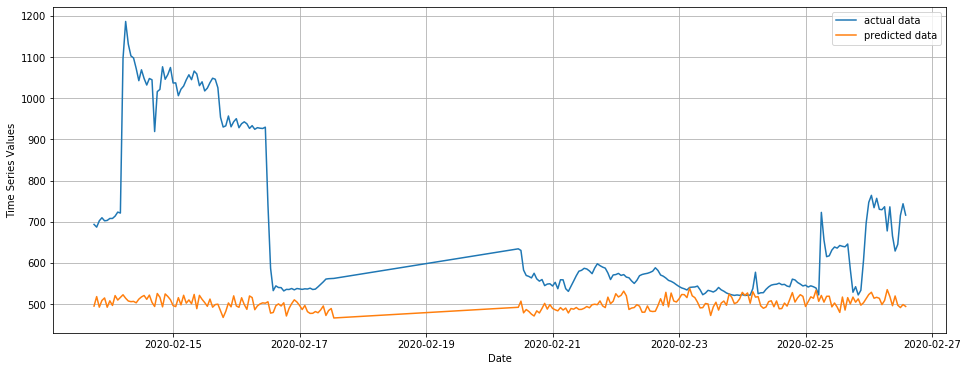

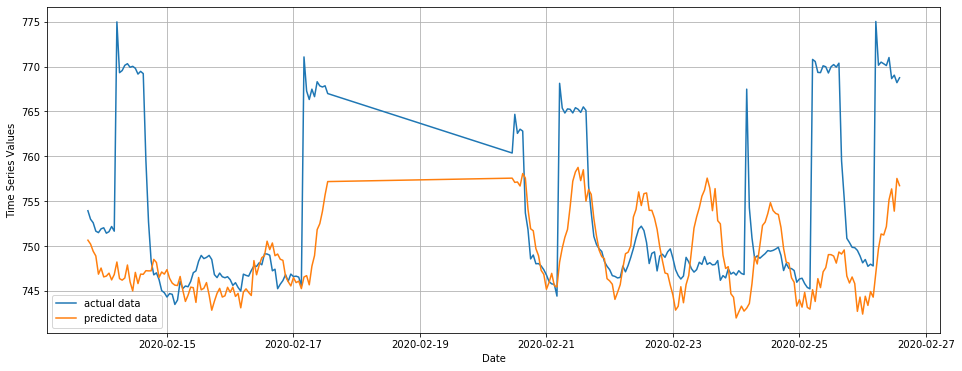

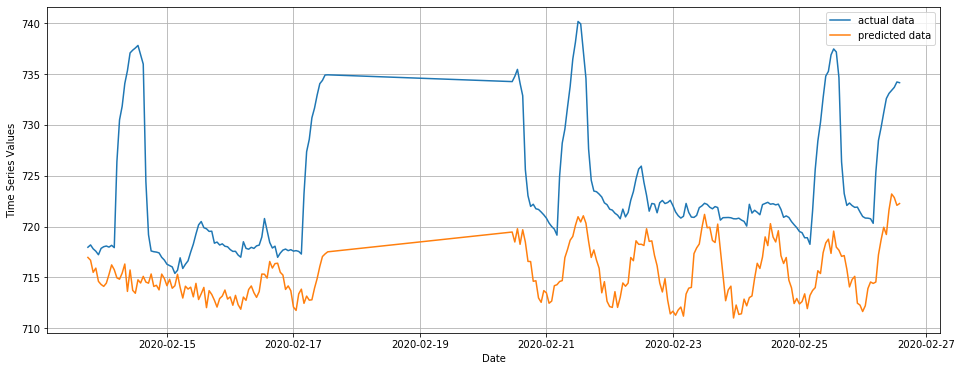

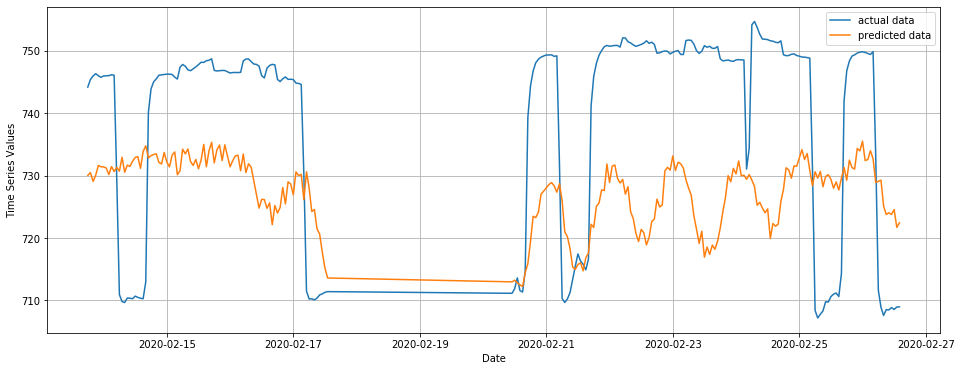

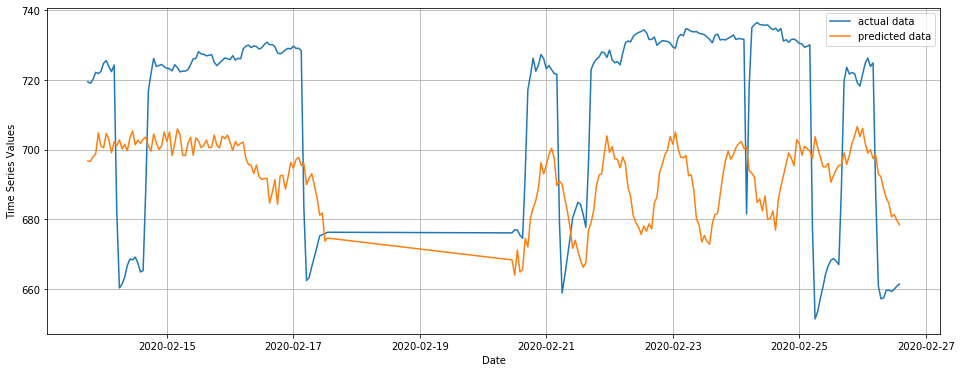

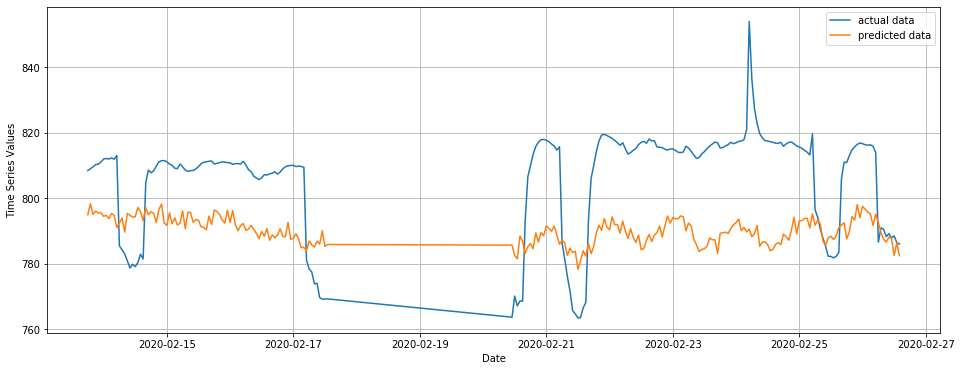

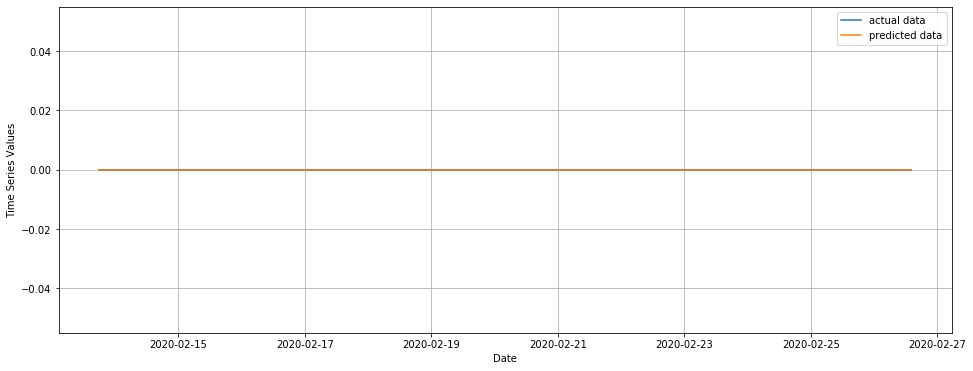

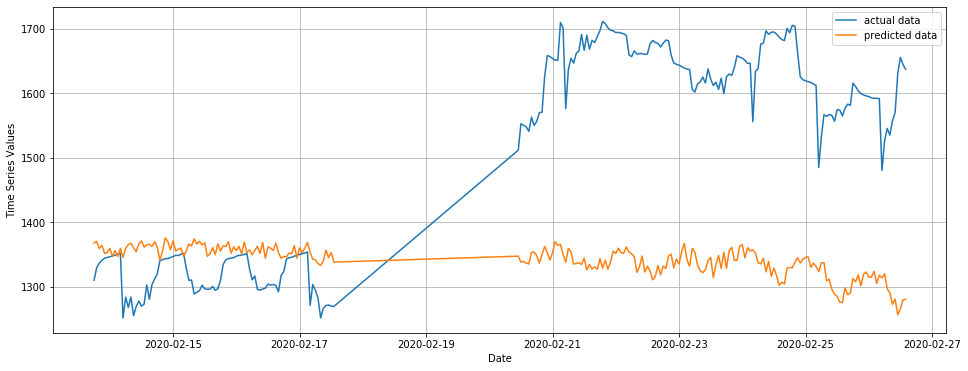

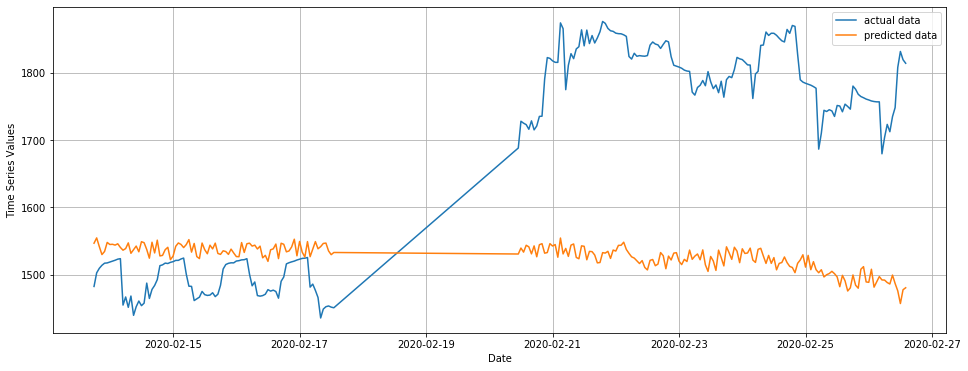

In [139]:
timeDate = testData.index[-24*10:]

for i in range(9):
    plt.figure(figsize=(16,6))
    plt.plot(timeDate, inv_y[0,i::9].T, label='actual data')
    plt.plot(timeDate, inv_yhat[0,i::9].T, label='predicted data')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Time Series Values')
    plt.show()

In [155]:
271.745**2

73845.345025